![](svd.png)

In [1]:
from jax import vmap, jit, grad, vmap
import jax.numpy as jnp

# Enable 64-bit mode
from jax.config import config
config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline
plt.style.use('dark_background')

# Retina display
%config InlineBackend.figure_format = 'retina'

In [2]:
# Create an array of 8 points around a unit circle, each at 45 degrees distance
x = jnp.array([[1, 0], [0.707, 0.707], [0, 1], [-0.707, 0.707], [-1, 0], [-0.707, -0.707], [0, -1], [0.707, -0.707]])

# Define the matrix A
A = jnp.array([[3, 0], [4, 5]])

# Compute the SVD of A
U, S, VT = jnp.linalg.svd(A, full_matrices=False)
V = VT.T

In [3]:
def matvec(A, vec):
    """
    vec: (2,)
    A: (2, 2)
    """
    return A@vec

In [4]:
matvec(A, x[0]), matvec(A, x[1])

(DeviceArray([3., 4.], dtype=float64),
 DeviceArray([2.121, 6.363], dtype=float64))

In [5]:
# vmap the matvec function
vmap_matvec = vmap(matvec, in_axes=(None, 0))
Ax = vmap_matvec(A, x)
Ax

DeviceArray([[ 3.   ,  4.   ],
             [ 2.121,  6.363],
             [ 0.   ,  5.   ],
             [-2.121,  0.707],
             [-3.   , -4.   ],
             [-2.121, -6.363],
             [ 0.   , -5.   ],
             [ 2.121, -0.707]], dtype=float64)

In [6]:
Vx = vmap_matvec(VT, x)
Vx

DeviceArray([[-7.07106781e-01, -7.07106781e-01],
             [-9.99848989e-01,  6.74518966e-18],
             [-7.07106781e-01,  7.07106781e-01],
             [-6.74518966e-18,  9.99848989e-01],
             [ 7.07106781e-01,  7.07106781e-01],
             [ 9.99848989e-01, -6.74518966e-18],
             [ 7.07106781e-01, -7.07106781e-01],
             [ 6.74518966e-18, -9.99848989e-01]], dtype=float64)

In [7]:
SV = Vx*S
SV

DeviceArray([[-4.74341649e+00, -1.58113883e+00],
             [-6.70719092e+00,  1.50827026e-17],
             [-4.74341649e+00,  1.58113883e+00],
             [-4.52481078e-17,  2.23573031e+00],
             [ 4.74341649e+00,  1.58113883e+00],
             [ 6.70719092e+00, -1.50827026e-17],
             [ 4.74341649e+00, -1.58113883e+00],
             [ 4.52481078e-17, -2.23573031e+00]], dtype=float64)

In [8]:
vmap_matvec(U, SV)

DeviceArray([[ 3.00000000e+00,  4.00000000e+00],
             [ 2.12100000e+00,  6.36300000e+00],
             [ 9.53863757e-16,  5.00000000e+00],
             [-2.12100000e+00,  7.07000000e-01],
             [-3.00000000e+00, -4.00000000e+00],
             [-2.12100000e+00, -6.36300000e+00],
             [-9.53863757e-16, -5.00000000e+00],
             [ 2.12100000e+00, -7.07000000e-01]], dtype=float64)

In [9]:
jnp.allclose(vmap_matvec(U, SV), vmap_matvec(A, x))

DeviceArray(True, dtype=bool)

In [10]:
vmap_matvec(U, SV)

DeviceArray([[ 3.00000000e+00,  4.00000000e+00],
             [ 2.12100000e+00,  6.36300000e+00],
             [ 9.53863757e-16,  5.00000000e+00],
             [-2.12100000e+00,  7.07000000e-01],
             [-3.00000000e+00, -4.00000000e+00],
             [-2.12100000e+00, -6.36300000e+00],
             [-9.53863757e-16, -5.00000000e+00],
             [ 2.12100000e+00, -7.07000000e-01]], dtype=float64)

In [11]:
vmap_matvec(A, x)

DeviceArray([[ 3.   ,  4.   ],
             [ 2.121,  6.363],
             [ 0.   ,  5.   ],
             [-2.121,  0.707],
             [-3.   , -4.   ],
             [-2.121, -6.363],
             [ 0.   , -5.   ],
             [ 2.121, -0.707]], dtype=float64)

Angle of rotation by V: -135.00 degrees


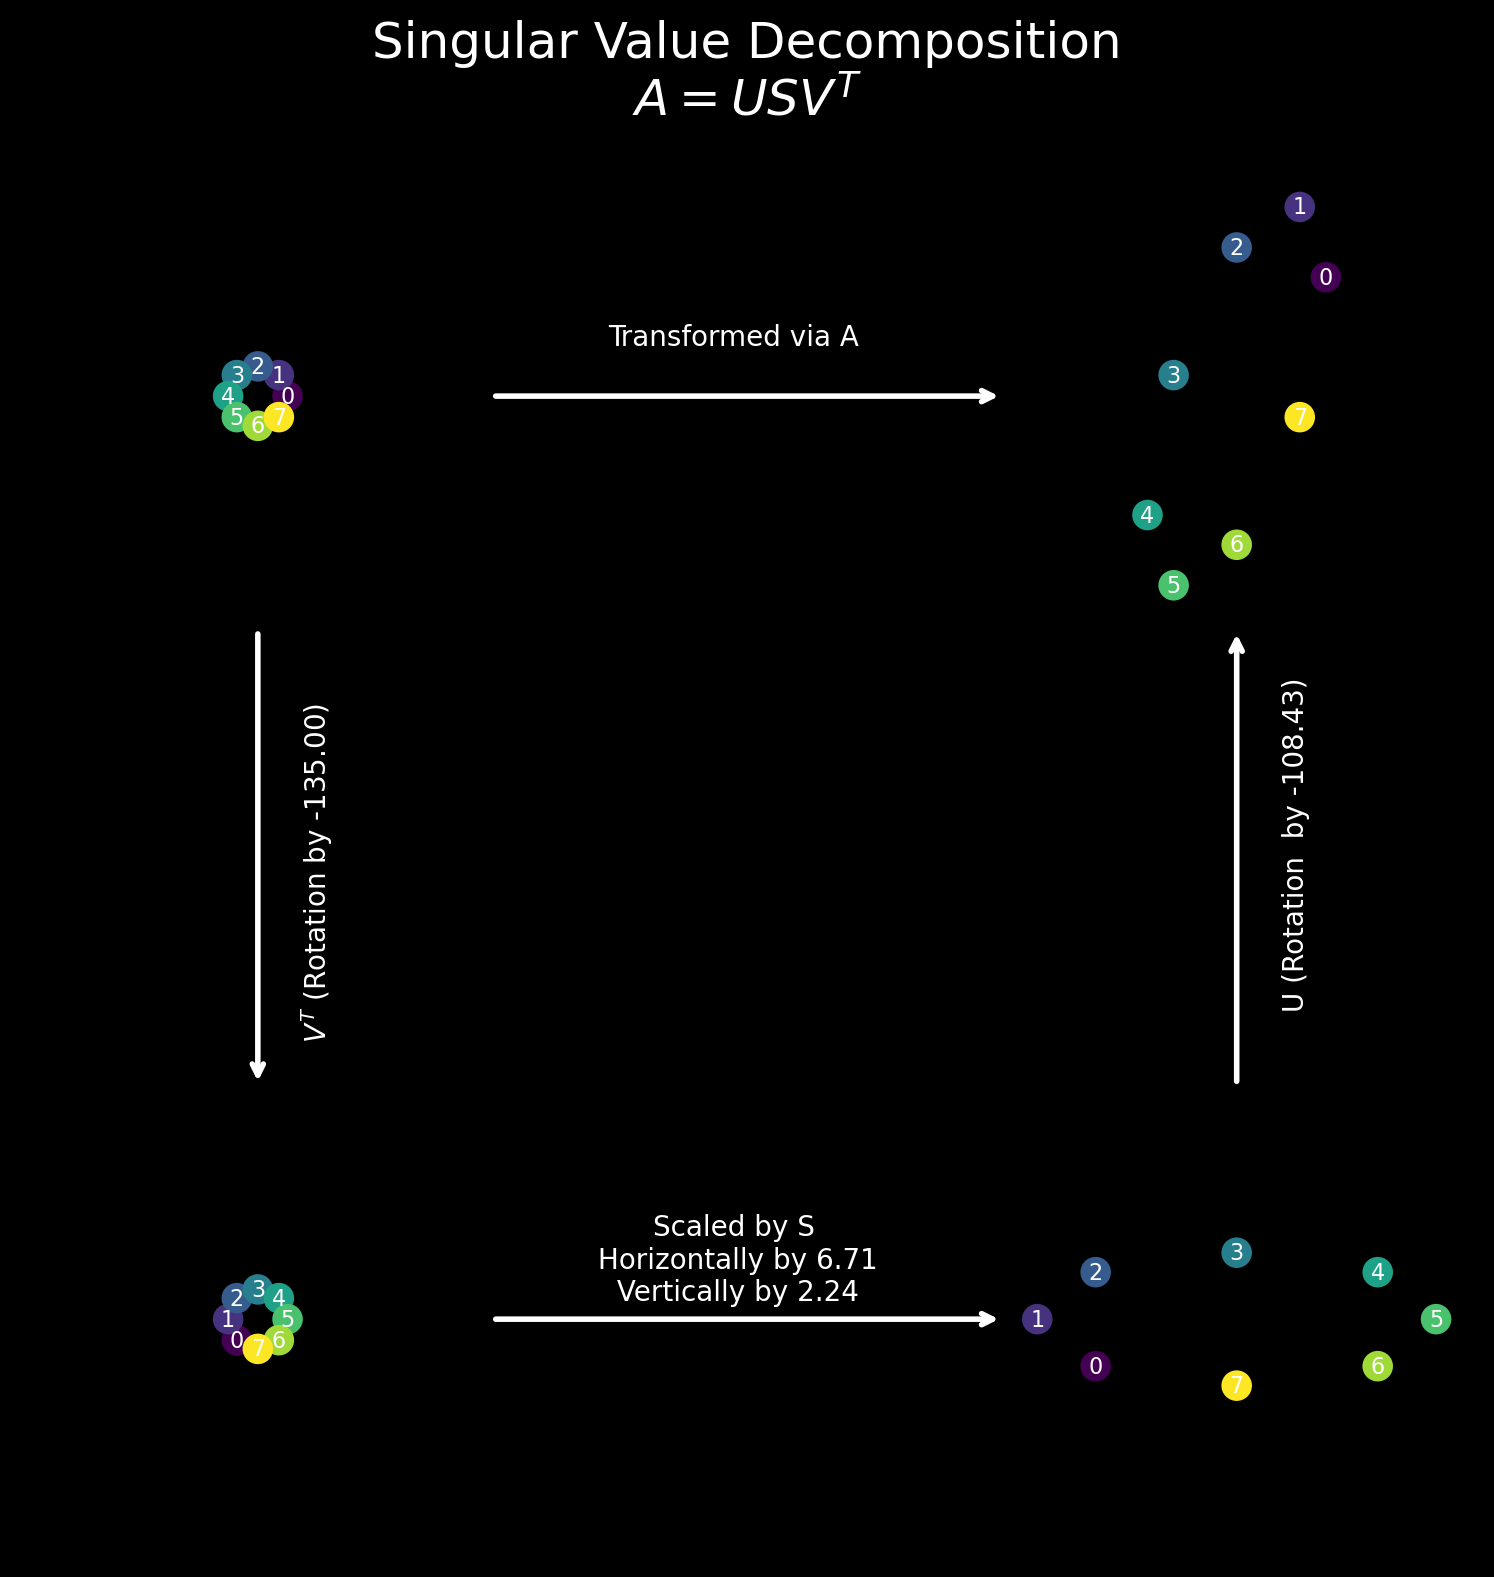

In [17]:
# Plot subplots of the above transformations in one figure with arrows showing the direction of transformation.
# We have 2 rows and 2 columns

fs = 8
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Modify the plot function to accept an axis object
def plot(x, ax):
    ax.set_facecolor((0.0, 0.0, 0.0, 1))
    ax.scatter(x[:, 0], x[:, 1], c=jnp.arange(x.shape[0]), cmap='viridis', s=100)
    # Add the index of the point as a label
    for i in range(x.shape[0]):
        ax.text(x[i, 0], x[i, 1], str(i), color='white', fontsize=8, ha='center', va='center')
    ax.set_xlim(-fs, fs)
    ax.set_ylim(-fs, fs)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.zorder = -1

    # Disable the border axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    


# Plot the original points
plot(x, ax[0, 0])

# Plot transformed points by A using JAX.vmap
xa = vmap_matvec(A, x)
plot(xa, ax[0, 1])

# Plot rotated points by VT
xv = vmap_matvec(VT, x)

# Find the angle of rotation by V
angle_v = jnp.arctan2(VT[1, 0], VT[0, 0])
print('Angle of rotation by V: {:.2f} degrees'.format(angle_v*180/jnp.pi))
plot(xv, ax[1, 0])

angle_u = jnp.arctan2(U[1, 0], U[0, 0])

# plot the above points scaled by S
xs = xv*S
plot(xs, ax[1, 1])

# Add an arrow between [0, 0] and [0, 1] subplots using the matplotlib.patch.ConnectionPatch
# add some text "transformed via A" to the arrow
con = ConnectionPatch(xyA=(fs, 0), xyB=(-fs, 0), coordsA="data", coordsB="data", axesA=ax[0, 0], axesB=ax[0, 1], 
                      color="w", zorder=1, arrowstyle='->', lw=2)
ax[0, 0].add_artist(con)
ax[0, 0].text(2*fs, 2, 'Transformed via A', color='w', fontsize=10, ha='center', va='center', zorder=1)

con1 = ConnectionPatch(xyA=(0, -fs), xyB=(0, fs), coordsA="data", coordsB="data", axesA=ax[0, 0], axesB=ax[1, 0], 
                      color="w", zorder=1, arrowstyle='->', lw=2)
ax[0, 0].add_artist(con1)
ax[0, 0].text(2, -2*fs, r'$V^T$' +f' (Rotation by {angle_v*180/jnp.pi:0.2f})', color='w', fontsize=10, ha='center', va='center', zorder=1, rotation=90)

con2 = ConnectionPatch(xyA=(fs, 0), xyB=(-fs, 0), coordsA="data", coordsB="data", axesA=ax[1, 0], axesB=ax[1, 1], 
                      color="w", zorder=1, arrowstyle='->', lw=2)
ax[1, 0].add_artist(con2)
ax[1, 0].text(2*fs, 2, f'Scaled by S\n Horizontally by {S[0]:0.2f}\n Vertically by {S[1]:0.2f}', color='w', fontsize=10, ha='center', va='center', zorder=1)

con3 = ConnectionPatch(xyA=(0, fs), xyB=(0, -fs), coordsA="data", coordsB="data", axesA=ax[1, 1], axesB=ax[0, 1], 
                      color="w", zorder=1, arrowstyle='->', lw=2)
ax[1, 1].add_artist(con3)
ax[1, 1].text(2, 2*fs, f'U (Rotation  by {angle_u*180/jnp.pi:0.2f})', color='w', fontsize=10, ha='center', va='center', zorder=1, rotation=90)



# Add a lot of spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Singular Value Decomposition\n' +r'$A = USV^T$', fontsize=18, color='w')
fig.tight_layout()
fig.savefig('svd.png', dpi=600, bbox_inches='tight')